# Planetary Physics by Paul Andreini
Lol I'm bored so lemme make some planets go round a star.

In [2]:
## Importing relevant packages...
import time as t
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as joindirs
from os.path import abspath as absp
from numpy.linalg import norm as length

abs_path = absp("")  ## Path to this Jupyter Notebook, to be determined "at runtime".

print("Done!")

Done!


In [3]:
## Defining physical constants...
solar_mass = 1.989e30   ## kg
earth_mass = 5.972e24   ## kg
astro_unit = 1.496e11   ## m
capital_G  = 6.674e-11  ## N kg^-2 m^2
day_in_sec = 86400      ## s
julian_yr  = 365.25 * day_in_sec     ## one Julian year in seconds.
orb_circum = 2 * np.pi * astro_unit  ## C = 2πr
orb_veloc  = orb_circum / julian_yr  ## v = ∆x/∆t

## Defining orbital parameters for use later.
dt   = 60                      ## number of seconds between each time-point.
num  = (julian_yr + 1) / dt    ## number of time-points ((1 Julian yr + 1 sec) / dt).
revs = (num * dt) / julian_yr  ## number of revolutions to be simulated.

print(f"We will be simulating {np.round(revs, 3)} complete orbits of Earth about the Sun.")

We will be simulating 1.0 complete orbits of Earth about the Sun.


In [4]:
def time_printer(st: t.time(), en: t.time()):
    """
       Prints elapsed time in a human-readable format: "#h hr; #m min; #s sec".
    
       ARGUMENTS:
        st (t.time() time point): FIRST point in time;
        en (t.time() time point): FINAL point in time.
    
       RETURNS:
        VOID (prints out elapsed time in the above-indicated format)
    """
    delta_t = en - st
    num_hr = int(delta_t / 3600)  ## Double-divide ("//") doesn't appear to be working, here...
    rem_hr = delta_t % 3600       ## Modulo operator; this is elapsed time less the whole number of hours.
    num_mn = int(rem_hr / 60)
    num_sc = np.round(rem_hr % 60, 4)
    print(f"Simulation complete in {num_hr} hours; {num_mn} min; {num_sc} sec.")
    
print("Done!")

Done!


## Online Hint
See, e.g., [https://math.stackexchange.com/questions/721076/help-with-using-the-runge-kutta-4th-order-method-on-a-system-of-2-first-order-od] for an application of RK4 to a 2nd-order ODE. Basically, you have to define $\boldsymbol{v} := \dot{\boldsymbol{x}}$ to convert the 2nd-order ODE into a system of two 1st-order ODE's.
__________________________________________________

## Problem Statement
We have for **Newton's Law of Gravitation**:
\begin{align}
    \ddot{\boldsymbol{x}} &= -\frac{G\!M_{\odot}}{x^{2}}\hat{r}\,.
    \tag{1}
\end{align}
Before we proceed further: the "dot" over a given quantity (be it a scalar or, as in this case, a vector) represents a ***time derivative***, *i.e.*:
\begin{equation}
    \dot{q} := \frac{dq}{dt}\,.
    \tag{2}
\end{equation}
Then, with the definition $\boldsymbol{v} := \dot{\boldsymbol{x}}$, we have the following system of two 1st-order ODE's:
\begin{align}
    \dot{\boldsymbol{x}} &= \boldsymbol{v}\,;
    \tag{3}\\
    \dot{\boldsymbol{v}} &= -\frac{G\!M_{\odot}}{x^{2}}\hat{r}\,,
    \tag{4}
\end{align}
subject to the following initial conditions:
\begin{align}
    \boldsymbol{x}(t=0) &=
        \begin{pmatrix}
            a_{0} \\ 0
        \end{pmatrix};
    \tag{5}\\
    \boldsymbol{v}(t=0) &=
        \begin{pmatrix}
            0 \\ v_{0}
        \end{pmatrix},
    \tag{6}
\end{align}
where $a_{0} := 1\,\text{AU} = 1.496\times10^{11}\,\text{m}$ and $v_{0} = 2.979\times10^{4}\,\mathrm{m\,s^{-1}}$ are the initial radial distance between the Sun and the Earth and the initial tangential (orbital) velocity of the Earth about the Sun, respectively.
__________________________________________________

## *Generic* RK4 Algorithm for 2nd-order ODE's
#### *(Copied from above Math StackExchange link.)*
Suppose we want to solve the following (scalar-valued) 2nd-order ODE:
\begin{equation}
    y'' + y' - 6y = 0\,.
    \tag{i}
\end{equation}
Note that, in Eq. $1$, it is implied that $y \equiv y(x)$, *i.e.*, $y$ is a univariate function of $x$. We can do so by splitting Eq. $\mathrm{i}$ into a system of two 1st-order ODE's, just as we did with Eq. $1$ to get Eqs. $3$ & $4$:
\begin{equation}
    \text{Let }z := y'\,.
    \tag{ii}
\end{equation}
Proceeding as above (*i.e.*, in the section called "**Problem Statement**"), we have for the system of 1st-order ODE's:
\begin{align}
    y' = z &=: f(x, y, z) \equiv f(z)\,;
    \tag{iii}\\
    z' = 6y - z &=: g(x, y, z) \equiv g(y, z)\,,
    \tag{iv}
\end{align}
Naturally, we need to supply initial conditions (analogous to Eqs. $5$ & $6$), and a time-step size, $h$:
\begin{align}
    y_{0} &= 3\,;
    \tag{v}\\
    z_{0} &= 1\,;
    \tag{vi}
\end{align}
### Here is the algorithm *in principle*.
Follow this order of execution ***precisely!*** Start with $n=0$.
\begin{align}
    k_{0} &= hf(x_{n}, y_{n}, z_{n})\,,
    \tag{vii}\\
    \ell_{0} &= hg(x_{n}, y_{n}, z_{n})\,;
    \tag{viii}\\
    k_{1} &= hf\Big( x_{n} + \frac{h}{2}, y_{n} + \frac{k_{0}}{2}, z_{n} + \frac{\ell_{0}}{2} \Big)\,,
    \tag{ix}\\
    \ell_{1} &= hg\Big( x_{n} + \frac{h}{2}, y_{n} + \frac{k_{0}}{2}, z_{n} + \frac{\ell_{0}}{2} \Big)\,;
    \tag{x}\\
    k_{2} &= hf\Big( x_{n} + \frac{h}{2}, y_{n} + \frac{k_{1}}{2}, z_{n} + \frac{\ell_{1}}{2} \Big)\,,
    \tag{xi}\\
    \ell_{2} &= hg\Big( x_{n} + \frac{h}{2}, y_{n} + \frac{k_{1}}{2}, z_{n} + \frac{\ell_{1}}{2} \Big)\,;
    \tag{xii}\\
    k_{3} &= hf(x_{n} + h, y_{n} + k_{2}, z_{n} + \ell_{2})\,,
    \tag{xiii}\\
    \ell_{3} &= hg(x_{n} + h, y_{n} + k_{2}, z_{n} + \ell_{2})\,.
    \tag{xiv}
\end{align}
Using the eight constants, $\{ k_{0}, \ell_{0}, k_{1}, \ell_{1}, k_{2}, \ell_{2}, k_{3}, \ell_{3} \}$, as well as the known variable values, $\{y_{n}, z_{n}\}$, we can calculate the updated variable values $\{y_{n+1}, z_{n+1}\}$:
\begin{align}
    y_{n+1} &= y_{n} + \frac{1}{6}\big( k_{0} + 2(k_{1} + k_{2}) + k_{3} \big)\,;
    \tag{xv}\\
    z_{n+1} &= z_{n} + \frac{1}{6}\big( \ell_{0} + 2(\ell_{1} + \ell_{2}) + \ell_{3} \big)\,.
    \tag{xvi}
\end{align}
We proceed with $n \to n+1$, and then repeat from Eq. $\mathrm{vii}$ once again. We repeat this loop-process until we have exhausted the desired steps in $x$.
### Here is the algorithm *in practice*.
Of course, in Eq. $\mathrm{iii}$, we determined that $f(x_{n}, y_{n}, z_{n}) \equiv f(z_{n}) = z_{n}$; likewise, in Eq. $\mathrm{iv}$, we determined that $g(x_{n}, y_{n}, z_{n}) \equiv g(y_{n}, z_{n}) = 6y_{n} - z_{n}$. Thus, our notation in Eqs. $\mathrm{vii}$ --- $\mathrm{xiv}$ was ***overly-generic***. Here, we evaluate the first step in the RK4 algorithm with our scalar-valued example (suppose we choose $h=0.1$):
\begin{align}
    k_{0} &= hz_{0} = 0.1(1) = 0.1\,,
    \tag{xvii}\\
    \ell_{0} &= h(6y_{0} - z_{0}) = 0.1\big( 6(3) - 1 \big) = 1.7\,;
    \tag{xviii}\\
    k_{1} &= h\Big( z_{0} + \frac{\ell_{0}}{2} \Big) = 0.1(1 + 0.85) = 0.185\,,
    \tag{xix}\\
    \ell_{1} &= h\Big\{ 6\Big( y_{0} + \frac{k_{0}}{2} \Big) - \Big( z_{0} + \frac{\ell_{0}}{2} \Big) \Big\}
        = 0.1\big\{ 6(3 + 0.85) - (1 + 0.0925) \big\}
        = 2.20075
    \tag{xx}
\end{align}
and so on and so forth. If we continue this process, say, out to $y_{10}$, we will find that it is extremely close to the exact solution, which is given by:
\begin{align}
    y(x) &= \exp{(-3x)} + 2\exp{(2x)}
    \tag{xxi}\\
    \implies y(1) &\approx 14.82789927
    \tag{xxii}
\end{align}
__________________________________________________

## *Specific* RK4 Algorithm for Newton's Law of Gravitation
Using Eq. $3$, in analogy to Eq. $\mathrm{iii}$, we have:
\begin{equation}
    \dot{\boldsymbol{x}} =: f\big( t, \boldsymbol{x}(t), \boldsymbol{v}(t) \big) \equiv f( \boldsymbol{v} )
        = \boldsymbol{v}\,;
    \tag{7}
\end{equation}
similarly, using Eq. $4$, in analogy to Eq. $\mathrm{iv}$, we have:
\begin{equation}
    \dot{\boldsymbol{v}} =: g\big( t, \boldsymbol{x}(t), \boldsymbol{v}(t) \big) \equiv g( \boldsymbol{x} )
        = -\frac{G\!M_{\odot}}{x^{2}}\hat{r}\,.
    \tag{8}
\end{equation}
We now proceed to apply the example algorithm to this specific case.
\begin{align}
    \boldsymbol{k}_{0} &= hf\big( t_{n}, \boldsymbol{x}_{n}, \boldsymbol{v}_{n} \big) = hf( \boldsymbol{v}_{n} )
        = h\boldsymbol{v}_{n}\,,
    \tag{9}\\
    \boldsymbol{\ell}_{0} &= hg\big( t_{n}, \boldsymbol{x}_{n}, \boldsymbol{v}_{n} \big) = hg( \boldsymbol{x}_{n} )
        = -\frac{hG\!M_{\odot}}{x_{n}^{2}}\hat{r}\,;
    \tag{10}\\
    \boldsymbol{k}_{1} &= hf\Big( t_{n} + \frac{h}{2}, \boldsymbol{x}_{n} + \frac{\boldsymbol{k}_{0}}{2}, \boldsymbol{v}_{n} + \frac{\boldsymbol{\ell}_{0}}{2} \Big)
        = hf\Big( \boldsymbol{v}_{n} + \frac{\boldsymbol{\ell}_{0}}{2} \Big)\,,
    \tag{11}\\
    \boldsymbol{\ell}_{1} &= hg\Big( t_{n} + \frac{h}{2}, \boldsymbol{x}_{n} + \frac{\boldsymbol{k}_{0}}{2}, \boldsymbol{v}_{n} + \frac{\boldsymbol{\ell}_{0}}{2} \Big)
        = hg\Big( \boldsymbol{x}_{n} + \frac{\boldsymbol{k}_{0}}{2} \Big)\,;
    \tag{12}\\
    \boldsymbol{k}_{2} &= hf\Big( t_{n} + \frac{h}{2}, \boldsymbol{x}_{n} + \frac{\boldsymbol{k}_{1}}{2}, \boldsymbol{v}_{n} + \frac{\boldsymbol{\ell}_{1}}{2} \Big)
        = hf\Big( \boldsymbol{v}_{n} + \frac{\boldsymbol{\ell}_{1}}{2} \Big)\,,
    \tag{13}\\
    \boldsymbol{\ell}_{2} &= hg\Big( t_{n} + \frac{h}{2}, \boldsymbol{x}_{n} + \frac{\boldsymbol{k}_{1}}{2}, \boldsymbol{v}_{n} + \frac{\boldsymbol{\ell}_{1}}{2} \Big)
        = hg\Big( \boldsymbol{x}_{n} + \frac{\boldsymbol{k}_{1}}{2} \Big)\,;
    \tag{14}\\
    \boldsymbol{k}_{3} &= hf(t_{n} + h, \boldsymbol{x}_{n} + \boldsymbol{k}_{2}, \boldsymbol{v}_{n} + \boldsymbol{\ell}_{2})
        = hf(\boldsymbol{v}_{n} + \boldsymbol{\ell}_{2})\,,
    \tag{15}\\
    \boldsymbol{\ell}_{3} &= hg(t_{n} + h, \boldsymbol{x}_{n} + \boldsymbol{k}_{2}, \boldsymbol{v}_{n} + \boldsymbol{\ell}_{2})
        = hg(\boldsymbol{x}_{n} + \boldsymbol{k}_{2})\,.
    \tag{16}
\end{align}
Using the eight constants, $\{ \boldsymbol{k}_{0}, \boldsymbol{\ell}_{0}, \boldsymbol{k}_{1}, \boldsymbol{\ell}_{1}, \boldsymbol{k}_{2}, \boldsymbol{\ell}_{2}, \boldsymbol{k}_{3}, \boldsymbol{\ell}_{3} \}$, as well as the known variable values, $\{\boldsymbol{x}_{n}, \boldsymbol{v}_{n}\}$, we can thus calculate the updated variable values $\{\boldsymbol{x}_{n+1}, \boldsymbol{v}_{n+1}\}$:
\begin{align}
    \boldsymbol{x}_{n+1} &= \boldsymbol{x}_{n} + \frac{1}{6}\big( \boldsymbol{k}_{0} + 2(\boldsymbol{k}_{1} + \boldsymbol{k}_{2}) + \boldsymbol{k}_{3} \big)\,;
    \tag{17}\\
    \boldsymbol{v}_{n+1} &= \boldsymbol{v}_{n} + \frac{1}{6}\big( \boldsymbol{\ell}_{0} + 2(\boldsymbol{\ell}_{1} + \boldsymbol{\ell}_{2}) + \boldsymbol{\ell}_{3} \big)\,.
    \tag{18}
\end{align}
Just as in our toy-model example, we proceed with $n \to n+1$ and we go back to Eq. $9$. **Recall**: the vectors $\boldsymbol{x}_{0}$ and $\boldsymbol{v}_{0}$ are given in Eqs. $5$ & $6$, respectively.

In [6]:
## Plot the state of the system.
def plot_solar_system(x_vec=None, path=None,
                      v_vec=None, a_vec=None,
                      show=True, save=False, fname=None):
    """
       Plots the solar system. Optionally plots the instantaneous acceleration and velocity of the planet.
    
       %%%%% ADD TO THIS FUNCTION: %%%%%
        1. Ability to scale velocity- and acceleration-vectors to their magnitudes (approximately).
        2.    "     " plot the planet's trajectory (positions over time).
    
       ARGUMENTS:
        x_vec (np.ndarray, dims=2x1): 2D POSITION vector for the planet (REQUIRED).
        path  (np.ndarray, dims=2xN): Matrix of "x_vec" values; traces out the orbit of the planet (OPTIONAL).
        v_vec (np.ndarray, dims=2x1): 2D VELOCITY vector for the planet (OPTIONAL).
        a_vec (np.ndarray, dims=2x1): 2D ACCELERATION vector for the planet (OPTIONAL).
        show  (bool): Should the computer display the frame or not? Defaults to "True".
        save  (bool): Should the computer save the frame or not? Defaults to "False".
        fname (str): If "save == True", then under what filename should the computer save the frame?
    
       RETURNS:
        VOID (shows a plot, with option to save the file locally)
    """
    
    if x_vec is None:
        x_vec_emessage_line1 = "Attempting to plot the solar system without the planetary position.\n"
        x_vec_emessage_line2 = "Please supply a valid 2-vector under the parameter 'x_vec'."
        x_vec_emessage = x_vec_emessage_line1 + x_vec_emessage_line2
        raise ValueError(x_vec_emessage)
    
    ## Setting up a "figure" object, frame size (incl. axis limits in meters), title, and axis labels.
    plt.close()  ## Closes a previously-displayed figure, if any exist.
    plt.figure(figsize=(8, 8))
    plt.xlim(-1.2*astro_unit, 1.2*astro_unit)
    plt.ylim(-1.2*astro_unit, 1.2*astro_unit)
    plt.title("Example Solar System", fontsize=18)
    plt.xlabel("Horizontal Distance [m]", fontsize=15)
    plt.ylabel("Vertical Distance [m]", fontsize=15)
    
    ## Plotting ORBITAL TRAJECTORY.
    if path is not None:
        path = path.T  ## Transposing to get column vectors, as is typical in linear algebra.
        plt.plot(path[0], path[1], c="firebrick", label="Orbit", lw=2, linestyle="--")
    
    ## Plotting Earth ACCELERATION.
    if a_vec is not None:
        plt.quiver(x_vec[0], x_vec[1],
                   a_vec[0], a_vec[1],
                   color="forestgreen", label="Acceleration")
    
    ## Plotting Earth VELOCITY.
    if v_vec is not None:
        plt.quiver(x_vec[0], x_vec[1],
                   v_vec[0], v_vec[1],
                   color="royalblue", label="Velocity")
    
    ## Plotting Sun and Earth POSITION; also adding a grid and a legend.
    plt.scatter(0, 0, marker="*", s=400, c="goldenrod", edgecolor="k", label="Star")
    plt.scatter(x_vec[0], x_vec[1], marker="o", s=100, c="darkorange", edgecolor="k", label="Planet")
    plt.grid(True)
    plt.legend(loc="upper right")
    
    if save:
        if fname is None:
            fname_emessage_line1 = "Attempting to save a figure; no filename was provided.\n"
            fname_emessage_line2 = "Please supply a valid filename literal under the parameter 'fname'."
            fname_emessage = fname_emessage_line1 + fname_emessage_line2
            raise ValueError(fname_emessage)
        else:
            plt.savefig(f"{fname}.jpg", format="jpg", dpi=200)
    
    if show:
        plt.show()


## Lambda-expression for (negative) r-hat.
##  This is just the unit-vector pointing opposite x (position-vector).
r_hat = lambda eks: -eks / (length(eks))

## Lambda-expressions for functions f(v) and g(x).
##  These are defined symbolically in Eqs. (7) & (8), respectively.
eff = lambda vee: vee
gee = lambda eks: (capital_G * solar_mass) / (length(eks) ** 2) * r_hat(eks)

print("Done!")

Done!


[0.0, 29785.6783]
[-0.0059, -0.0]


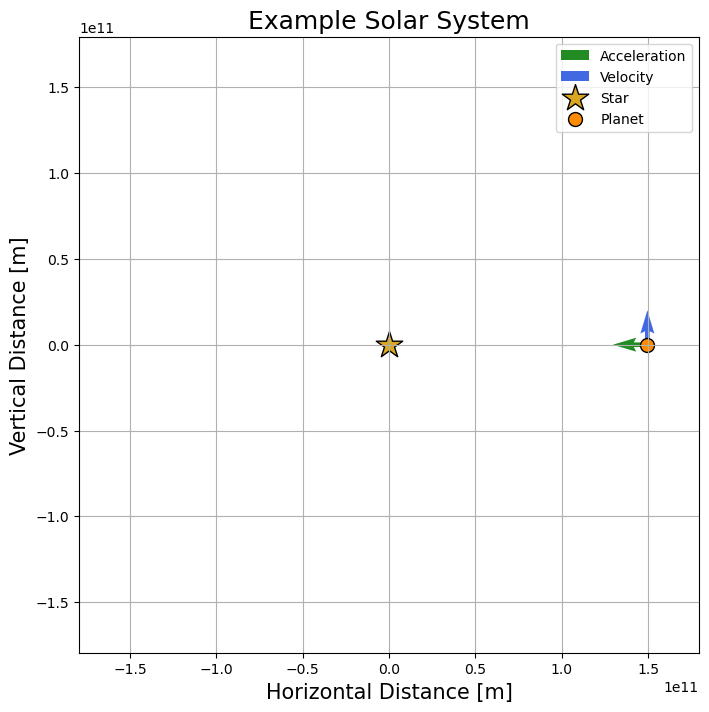

In [7]:
x = np.array([astro_unit, 0])
v = np.array([0, orb_veloc])
a = gee(x)

## Testing...
##  First result (velocity) should be proportional to +y-hat;
##  second result (acceleration) should be proportional to +x-hat.
##  See the figure, above.
print([np.round(j, 4) for j in eff(v)])
print([np.round(j, 4) for j in gee(x)])

plot_solar_system(x_vec=x, v_vec=v, a_vec=a)

In [8]:
def get_x_and_v(h, x_n, v_n):
    """
       Executes the Runge-Kutta 4th-order numerical integration technique to solve Newton's Law of Gravitation.
        Takes as arguments h (time-step size) and current coordinates in phase space, {x_n, v_n}, where x is...
        ...the position vector and v is the velocity vector.
        Thus, calculates the intermediary parameters, {k_j, l_j} where j={0, 1, 2, 3}.
        Uses these intermediary parameters to calculate {x_{n+1}, v_{n+1}}.
    
       ARGUMENTS:
        h (float): time-step size;
        x_n (np.ndarray, dims=2x1): current position;
        v_n (np.ndarray, dims=2x1): current velocity.
    
       RETURNS:
        x_{n+1} (np.ndarray, dims=2x1): next position;
        v_{n+1} (np.ndarray, dims=2x1): next velocity.
    """
    ## 1st step: defining k0 and l0 vectors.
    k0 = h * eff(v_n)
    l0 = h * gee(x_n)
    
    ## 2nd step: defining k1 and l1 vectors.
    k1 = h * eff(v_n + (l0 / 2))
    l1 = h * gee(x_n + (k0 / 2))
    
    ## 3rd step: defining k2 and l2 vectors.
    k2 = h * eff(v_n + (l1 / 2))
    l2 = h * gee(x_n + (k1 / 2))
    
    ## 4th step: defining k3 and l3 vectors.
    k3 = h * eff(v_n + l2)
    l3 = h * gee(x_n + k2)
    
    ## 5th step: updating position and velocity vectors.
    x_nPlus1 = x_n + ((k0 + 2*(k1 + k2) + k3) / 6)
    v_nPlus1 = v_n + ((l0 + 2*(l1 + l2) + l3) / 6)
    
    return x_nPlus1, v_nPlus1


## Lambda expression gives a set of values for use in progress reporting.
get_tenths = lambda total: np.linspace(0, total-1, 11).astype(int)[1:10]


def grav_rk4(h, N, x0, v0):
    """
       Runs the Runge-Kutta 4th-order numerical integration technique to solve Newton's Law of Gravitation.
    
       %%%%% ADD TO THIS FUNCTION %%%%%
        1. Track acceleration as well.
    
       ARGUMENTS:
        h (float): time-step size;
        N (int): desired number of time-steps to evolve;
        x0 (np.ndarray, dims=2x1): initial position vector;
        v0 (np.ndarray, dims=2x1): initial velocity vector.
    
       RETURNS:
        x_list (np.ndarray, dims=2xN): matrix whose columns are the positions;
        v_list (np.ndarray, dims=2xN): matrix whose columns are the velocities.
    """
    x_list = [x0]
    v_list = [v0]
    counter = 0
    tenths = get_tenths(N)
    
    while counter < N:
        x1, v1 = get_x_and_v(h=h, x_n=x0, v_n=v0)
        x_list.append(x1)
        v_list.append(v1)
        x0 = x1
        v0 = v1
        
        if counter == 0:
            print("Algorithm has just begun!\n")
        elif counter in tenths:
            idx = np.where(tenths == counter)[0][0]
            one_indexed_idx = idx + 1
            pct = 10 * one_indexed_idx
            print(f"Algorithm has run {pct}% to completion!")
        
        counter += 1
    
    return np.array(x_list), np.array(v_list)

print("Done!")

Done!


In [9]:
start = t.time()

## Running the RK4 algorithm; timing the execution using "time_printer(...)".
xs, vs = grav_rk4(h=dt, N=num, x0=x, v0=v)

end = t.time()
print()
time_printer(st=start, en=end)

Algorithm has just begun!

Algorithm has run 10% to completion!
Algorithm has run 20% to completion!
Algorithm has run 30% to completion!
Algorithm has run 40% to completion!
Algorithm has run 50% to completion!
Algorithm has run 60% to completion!
Algorithm has run 70% to completion!
Algorithm has run 80% to completion!
Algorithm has run 90% to completion!

Simulation complete in 0 hours; 0 min; 13.6972 sec.


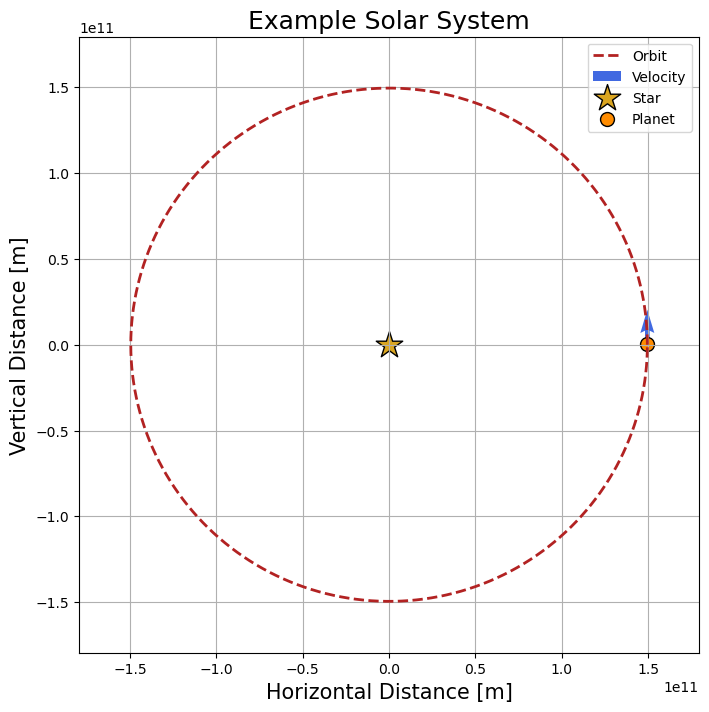

In [10]:
x_final = xs[-1]
v_final = vs[-1]

plot_solar_system(x_vec=x_final, path=xs, v_vec=v_final)

In [11]:
def save_jpegs(num_frames, x_coords_list=xs, v_coords_list=vs, a_coords_list=None, dest_dir=None):
    """
       Based on lists of vectors, {xs, vs, as}, plot the evolution of the solar system up to that point in time.
    
       ARGUMENTS:
        num_frames (int): Desired number of output frames.
        x_coords_list (np.ndarray, dims=2xN): List of 2-vectors denoting planetary POSITION;
        v_coords_list (np.ndarray, dims=2xN): List of 2-vectors denoting planetary VELOCITY (OPTIONAL);
        a_coords_list (np.ndarray, dims=2xN): List of 2-vectors denoting planetary ACCELERATION (OPTIONAL);
        dest_dir (str): Absolute path to a directory.
                         Defaults to "None"; the computer will create a new folder in the "current working directory".
    
       RETURNS:
        VOID (saves files in a desired folder)
    """
    N = len(xs)  ## how many time-points are listed.
    every_how_often = int(np.round(N/num_frames))  ## rounds to nearest whole, then chops off the (ir)rational part.
    frame_counter = 0
    tenths = get_tenths(num_frames)
    
    ## MAIN LOOP
    for j in range(N):
        if not (j % every_how_often):
            fname = f"frame{frame_counter:04}"
            fname_with_dir = joindirs(dest_dir, fname)
            full_fname_with_dir = joindirs(abs_path, fname_with_dir)
            plot_solar_system(x_vec=x_coords_list[j], path=x_coords_list[:j],
                              v_vec=v_coords_list[j], a_vec=None,
                              show=False, save=True, fname=fname_with_dir)
            
            if frame_counter == 0:
                print("Algorithm has just begun!\n")
            elif frame_counter in tenths:
                idx = np.where(tenths == frame_counter)[0][0]
                one_indexed_idx = idx + 1
                pct = 10 * one_indexed_idx
                print(f"Algorithm has run {pct}% to completion!")
            
            frame_counter += 1
        else:
            continue

print("Done!")

Done!


Algorithm has just begun!

Algorithm has run 10% to completion!
Algorithm has run 20% to completion!
Algorithm has run 30% to completion!
Algorithm has run 40% to completion!
Algorithm has run 50% to completion!
Algorithm has run 60% to completion!
Algorithm has run 70% to completion!
Algorithm has run 80% to completion!
Algorithm has run 90% to completion!

Simulation complete in 0 hours; 1 min; 12.5042 sec.


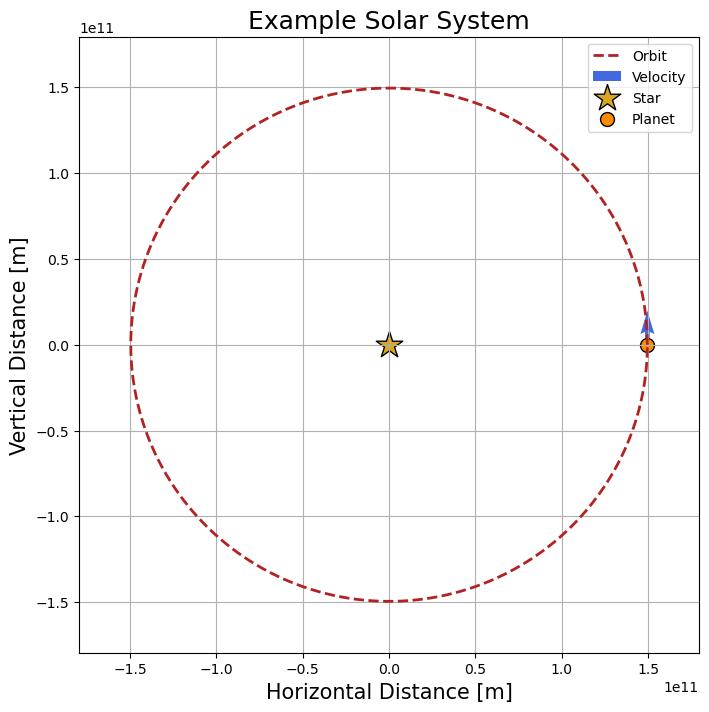

In [12]:
start = t.time()

save_jpegs(num_frames=1200, dest_dir="jpegs")

end = t.time()
print()
time_printer(st=start, en=end)

# E.O.F.